In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

df=pd.read_csv("Telco-Customer-Churn.csv")

In [39]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [40]:
df.shape

(7043, 21)

In [41]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Checking for missing values

In [42]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [43]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [44]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [45]:
columns = df.columns
binary_cols= []

for col in columns:
    if df[col].value_counts().shape[0] ==2 :
     binary_cols.append(col)

In [46]:
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [47]:
df['PhoneService'].head()

0     No
1    Yes
2    Yes
3     No
4    Yes
Name: PhoneService, dtype: object

In [48]:
df['PaperlessBilling']

0       Yes
1        No
2       Yes
3        No
4       Yes
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042    Yes
Name: PaperlessBilling, Length: 7043, dtype: object

In [49]:
# other columns with more two classes

In [50]:
multiple_cols_cat=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','paymentMethod','MontghlyCharges','MonthlyCharges']

In [51]:
print(multiple_cols_cat)

['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'paymentMethod', 'MontghlyCharges', 'MonthlyCharges']


# Binary Analysis

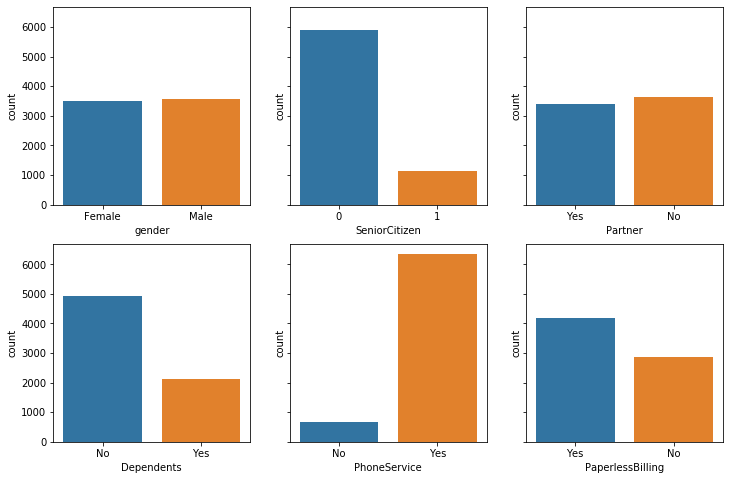

In [52]:
fig, axes = plt.subplots( 2,3 , figsize=(12,8), sharey=True)

sns.countplot("gender",data=df, ax= axes[0,0] )
sns.countplot("SeniorCitizen",data=df, ax= axes[0,1] )
sns.countplot("Partner",data=df, ax= axes[0,2] )
sns.countplot("Dependents",data=df, ax= axes[1,0] )
sns.countplot("PhoneService",data=df, ax= axes[1,1] )
sns.countplot("PaperlessBilling",data=df, ax= axes[1,2] )

In [64]:
churn_numeric =[]
for i in range(len(df)):
    if df['Churn'][i] == 'Yes':
        churn_numeric.append(1)
    else :
        churn_numeric.append(0)

In [65]:
churn_numeric[:5]

[0, 0, 1, 0, 1]

In [69]:
df['Churn'] = churn_numeric

In [70]:
df[['gender', 'Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


In [71]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [72]:
df[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [74]:
df[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [78]:
df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


# NOT binary analysis

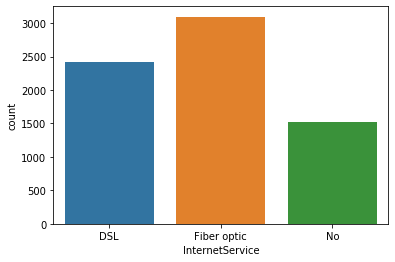

In [79]:
sns.countplot("InternetService", data=df)

In [80]:
df[['InternetService','Churn']].groupby('InternetService').mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [82]:
df[['InternetService','MonthlyCharges']].groupby('InternetService').mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


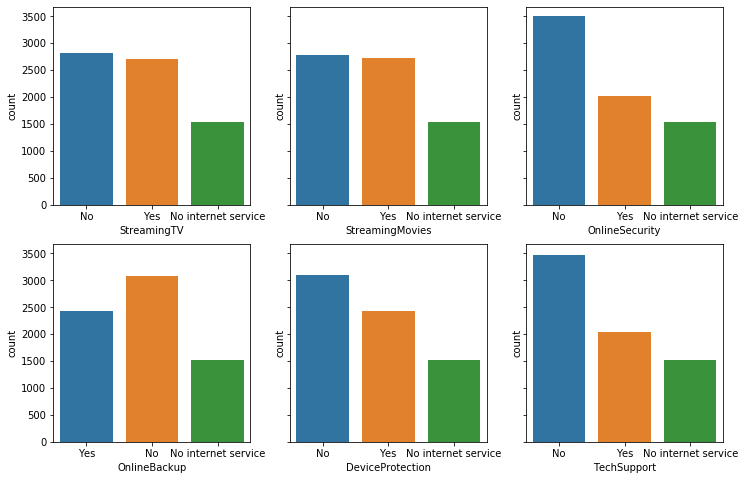

In [86]:
fig , axes = plt.subplots(2,3,figsize=(12,8), sharey=True)

sns.countplot("StreamingTV",data=df,ax=axes[0,0])
sns.countplot("StreamingMovies",data=df,ax=axes[0,1])
sns.countplot("OnlineSecurity",data=df,ax=axes[0,2])
sns.countplot("OnlineBackup",data=df,ax=axes[1,0])
sns.countplot("DeviceProtection",data=df,ax=axes[1,1])
sns.countplot("TechSupport",data=df,ax=axes[1,2])